# AI Job Market Data Exploration

This notebook provides an interactive way to explore the AI job market dataset. We'll use various visualization and data manipulation techniques to make the data more accessible and easier to understand while also making sure it is ready to be processed.

## 1. Import Required Libraries

We'll import the necessary libraries for data analysis and visualization:

In [6]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
plt.style.use('seaborn-v0_8')
# Make plots appear in the notebook
%matplotlib inline
# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

## 2. Load Data from Source

Load the AI job market dataset:

In [7]:
# Download and load the dataset
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")
df = pd.read_csv(path + r"\ai_job_dataset.csv")

df['company_location'].value_counts()

company_location
Germany           814
Denmark           778
Canada            769
France            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Japan             733
Finland           733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64

## 3. Interactive Data Display

Let's look at the data in an interactive table format:

In [8]:
# Display the first 10 rows of the dataset
df.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


# 3.5 Data cleaning

In [9]:
# Drop unnecessary columns
df = df.drop(['salary_currency'], axis=1)

# Handle missing values
# For 'required_skills', fill missing values with 'Not Specified'
df['required_skills'] = df['required_skills'].fillna('Not Specified')
# For other columns, fill with the mode (most frequent value)
for col in ['experience_level', 'employment_type', 'education_required', 'industry', 'company_location', 'employee_residence', 'company_name', 'company_size']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Data cleaning complete.")

Data cleaning complete.


## 4. Data Visualization

Let's create some visualizations to better understand the data:

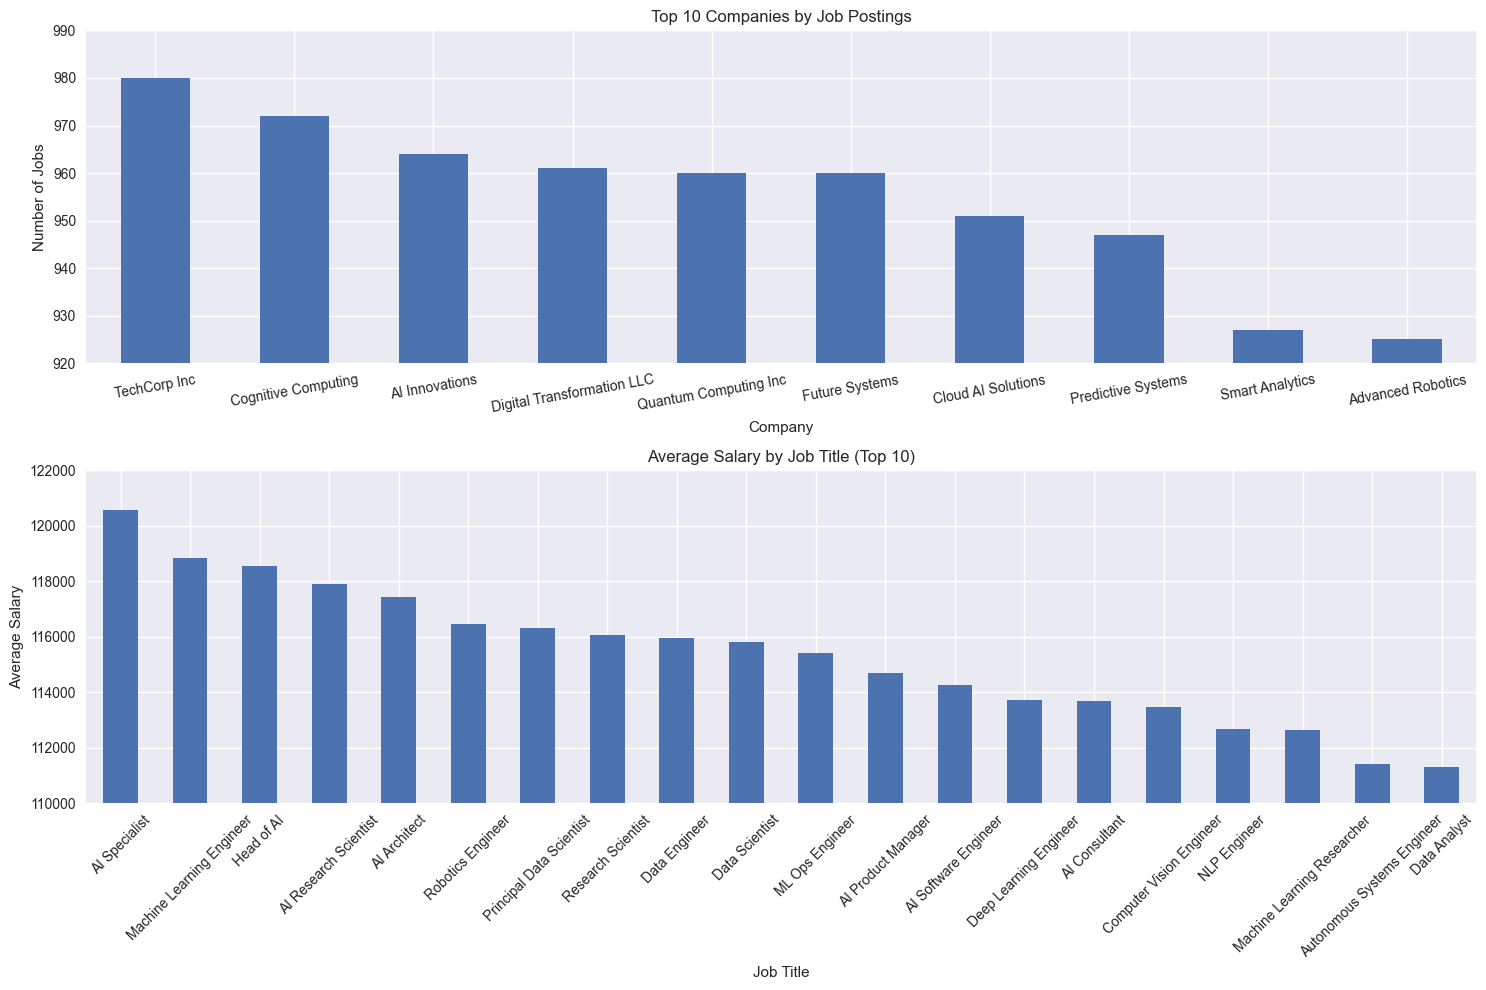

In [10]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot 1: Job counts by company
plt.subplot(2, 1, 1)
df['company_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Company')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=10)
plt.ylim(920, 990)  # Set y-axis limits for first plot

# Plot 2: Average salary by job title
plt.subplot(2, 1, 2)
avg_salary = df.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False).head(100)
avg_salary.plot(kind='bar')
plt.title('Average Salary by Job Title (Top 10)')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.ylim(110_000, 122_000)  # Set y-axis limits for second plot

plt.tight_layout()
plt.show()

## 5. Cleaning and Exporting Data

In [11]:
# Export to CSV
df.to_csv('ai_jobs_data_cleaned.csv', index=False)
print("Data exported to 'ai_jobs_data_cleaned.csv'")

Data exported to 'ai_jobs_data_cleaned.csv'
